# 기본 패턴

In [1]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 12))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 12))
y_test = np.random.randint(2, size=(100, 1))

# 2. 모델 구성하기
model = Sequential()
model.add(Input(shape=(12,)))  # 입력 형태를 명시하는 Input 레이어 사용
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-binary.keras', 
                                                save_best_only=True)  # 파일 확장자를 .keras로 변경
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)


In [2]:
y_train.shape, y_test[:5]

((1000, 1),
 array([[1],
        [0],
        [1],
        [1],
        [1]]))

In [3]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=64,callbacks=[checkpoint_cb, early_stopping_cb],
                 validation_data=(x_test, y_test)
                )

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4933 - loss: 0.7038 - val_accuracy: 0.4900 - val_loss: 0.6954
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5109 - loss: 0.6932 - val_accuracy: 0.5600 - val_loss: 0.6916
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5276 - loss: 0.6894 - val_accuracy: 0.5700 - val_loss: 0.6896
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.6865 - val_accuracy: 0.6000 - val_loss: 0.6897
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5687 - loss: 0.6843 - val_accuracy: 0.5700 - val_loss: 0.6897
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5738 - loss: 0.6860 - val_accuracy: 0.5500 - val_loss: 0.6876
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5450 - loss: 0.6847 - val_accuracy: 0.5500 - val_loss: 0.6899
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5580 - loss: 0.6828 - val_accuracy: 0

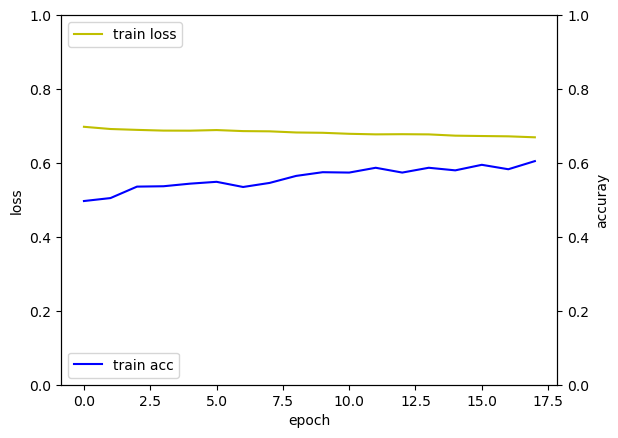

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6079 - loss: 0.6872 
loss_and_metrics : [0.6870984435081482, 0.5899999737739563]


In [4]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [5]:
# loss_and_metrics : [0.6974263787269592, 0.49000000953674316]

* 특정 패턴없이 무작위로 데이터가 생성되고 있기 때문에 정답율은 50% 정도 예상할 수 있다.
* 2진분류 방식 적용하는 문법 정도로 이해하자